&nbsp;

# Quantum Operations and Simulations in Qiskit

&nbsp;


## Contents

1. [Introduction](#introduction)

    1.1 [Overview of Qiskit](#qiskit_overview)
    
    1.2 [The quantum bit](#quantum_bit)
    
    
2. [Single-qubit states](#single_states)

    2.1 [Single-qubit operations](#single_operations)
    

3. [Multi-qubit states](#multi_qubits)

    3.1 [Multi-qubit operations](#multi_op)
    
    
4. [Summary](#summary)

&nbsp;

# 1. Introduction<a id='introduction'></a>


This set of classes draws ideas from an abundance of online learning materials for Qiskit, particularly the [Qiskit online tutorials](https://github.com/Qiskit/qiskit-iqx-tutorials) and [textbook](https://qiskit.org/textbook/preface.html). Another source was Miguel Ramalho's [Teach me quantum](https://github.com/msramalho/Teach-Me-Quantum), which was [recognized](https://www.ibm.com/blogs/research/2019/01/ibmq-teach-quantum-winners/) by IBM.

Images that are not our own were adapted from the IBM Q experience documentation and public Qiskit materials.

&nbsp;

## 1.1. QISKit - an overview<a id='qiskit_overview'></a>

<img src="https://miro.medium.com/max/2400/0*yUz39magP61kj3MR.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">

Qiskit is an open-source framework for working with quantum computers at the level of algorithms, quantum circuits, or even pulses. It can be installed and executed locally, but to execute your code in actual, public access quantum processors, you need to create a [IBM Quantum experience](https://quantum-computing.ibm.com) account.


Its main goals are:

 - to build a software stack for the development of quantum software and applications;
 - to make it easier for students to understand and learn about quantum computation;
 - to facilitate research on the most important open issues facing quantum computation today.

Qiskit supports the *Python* language, which is itself compatible with multiple programming paradigms.


The main pillar of this toolkit (which the majority of these classes will feature) is **Qiskit Terra**, and it allows us to:

- compose quantum programs at the level of circuits and pulses;
- optimize them for the constraints of a particular device;
- interact with the execution backends.

&nbsp;
<div style="width:image width px; font-size:80%; text-align:center;">
    <img src="https://qiskit.org/documentation/stable/0.24/_images/qiskit-framework.png" alt="Qiskit and its elements" width="800px" style="padding-bottom:0.5em;" />
    Qiskit and its elements (<a href="https://medium.com/qiskit/qiskit-and-its-fundamental-elements-bcd7ead80492">Source</a>)
</div>
&nbsp;



As of version `0.12`, Qiskit is composed of other 3 main modules:

**Aer** is a simulator framework for the stack - it allows us to:
- simulate the execution of a quantum circuit under ideal (ie noiseless) conditions;
- obtain the complete mathematical description of a given quantum state or quantum operator;
- construct highly configurable models for realistic noisy simulations of the errors that occur during execution on real devices;

<div class="alert alert-block alert-info">
Note that these simulations are performed on classical computers, and so are limited by classical resources.
</div>

**Ignis** is a framework for understanding and mitigating noise in quantum circuits and systems. The experiments provided in Ignis are grouped into the topics of:
- characterization of quantum system parameters such as noise (T1 and T2), and control errors in the gates;
- verification of quantum operation and ciruit performance, using for example process tomography or randomized benchmarking;
- error mitigation routines generated by execution of calibration circuits;

**Aqua** provides higher-level functionality by use of a library of quantum algorithms upon which applications of near term quantum computing can be built. Aqua specifically identifies four domains that stand to benefit from the development of quantum computation:
- Chemistry;
- Artificial Intelligence (AI);
- Optimization;
- Finance.

*Qiskit >=0.25.0 deprecates the Qiskit Aqua project.* The application modules that are provided by qiskit-aqua have been split into several new packages: qiskit-optimization, qiskit-nature, qiskit-machine-learning, and qiskit-finance. 

In March 2021, Qiskit launched **[Qiskit Metal](https://qiskit.org/metal/)** the first open-ource project to design superconducting quantum devices.

Qiskit is still under an intense development cycle, which means that new updates and features are added several times a year. You can find more information abou Qiskit elements in [here](https://qiskit.org/documentation/stable/0.24/the_elements.html).

&nbsp;

## 1.2. The quantum bit<a id='quantum_bit'></a>

&nbsp;

### A physical qubit

Any quantum system with two orthogonal states can be used to represent a quantum bit, or *qubit* for short.

<img src="https://image.slidesharecdn.com/presentationhandout-141230060346-conversion-gate01/95/lets-build-a-quantum-computer-15-638.jpg?cb=1419919453" width="300px" align="center">

Consider a simplified representation of the electron of a Hydrogen atom, orbiting around the nucleus, with two possible energy states. As this is a quantum particle, these energy states are quantized, that is, they take only discrete values. The energy state of the electron can be considered a quantum bit.

How can we represent quantum states and associated operations?

&nbsp;

### Bra-ket notation<a id='bra_ket'></a>

In quantum mechanics, wave functions and other quantum states can be represented as vectors in an abstract vector space.

The bra–ket notation is a standard notation for describing quantum states. It uses angle brackets (the $\rangle$ and $\langle$ symbols) with a vertical bar (the $|$ symbol) to denote labelled vectors.

- A *ket* $|u\rangle$ is typically written as a column vector, while a *bra* $\langle v |$ is typically written as a row vector.

- A *bra* and a *ket* with the same label are [Hermitian conjugates](https://en.wikipedia.org/wiki/Conjugate_transpose) of each other. 

This notation simplifies the representation of the scalar product of vectors, as well as the action of a linear operator on a vector and other operations over a complex vector space.

<div class="alert alert-block alert-info">
    
**Example 1.1 - Inner product with bra-ket**

Consider the ket vector $|u\rangle$  and $|v\rangle$ on a two-dimensional space:

$$
|u\rangle =  
\begin{pmatrix}
1 \\
0
\end{pmatrix};
\;\;
|v\rangle = 
\begin{pmatrix}
0 \\
i
\end{pmatrix};
$$

&nbsp;

Their respective hermitian conjugates, $\langle u|$ and $\langle v|$, can be represented as row vectors:

&nbsp;

$$
\langle u| =  
\begin{pmatrix}
1 & 0
\end{pmatrix};
\;\;
\langle v | = 
\begin{pmatrix}
0 & -i
\end{pmatrix};
$$

&nbsp;

The inner product between $\langle v|$ and $|u\rangle$ is represented as $\langle v | u \rangle$:

&nbsp;

$$
\langle v | u \rangle =
\begin{pmatrix}
0 & -i
\end{pmatrix}
\begin{pmatrix}
1 \\
0
\end{pmatrix} = 0 \, ;
$$

&nbsp;

A null inner product means that these vectors are orthogonal, thereby forming a basis in a two-dimensional space.
</div>

&nbsp;

# 2. Single qubit states<a id='single_states'></a>

&nbsp;

A single qubit quantum state $|\psi\rangle$ can be written as a complex superposition of its basis states, which by convention are generally named $|0\rangle$ and $|1\rangle$.

$$|\psi\rangle = \alpha|0\rangle + \beta |1\rangle$$

Here, $\alpha$ and $\beta$ are probability amplitudes generally described by complex numbers. When the qubit is measured, the quantum system "collapses" to the state $|0\rangle$ with probability $|\alpha|^2$, or to the state $|1\rangle$ with probability $|\beta|^2$.


The basis states represent the quantum analogue to the classical bit states $0$ and $1$:

$$
|0\rangle =  
\begin{pmatrix}
1 \\
0
\end{pmatrix};
\;\;\;
|1\rangle =  
\begin{pmatrix}
0 \\
1
\end{pmatrix};
$$

Which allows for the column representation of $|\psi\rangle$:

$$
|\psi\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}
$$

where $|\alpha|^2 + |\beta^2| = 1$.

<div class="alert alert-block alert-warning">

**Exercise 1.1 - Orthogonality**

Another well known example of a basis in a two-dimensional space is formed by the $|+\rangle$ and $|-\rangle$ states:

&nbsp;

$$
|+\rangle =  \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
1
\end{pmatrix};
\;\;\;
|-\rangle =  \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
-1
\end{pmatrix};
$$

&nbsp;

- Verify that these states are orthogonal by calculating the inner product $\langle + | - \rangle$.

</div>

&nbsp;

### Bloch sphere

The absolute squares of the probability amplitudes, $|\alpha|^2$ and $|\beta|^2$, represent the probability of the corresponding measurement outcome. A basic rule for probability is that the probabilities of all possible outcomes must add up to $1$, so it follows that $\alpha$ and $\beta$ must be constrained by the equation:

$$|\alpha|^2+ |\beta|^2 = 1$$

Ignoring the global phase of a qubit, i.e.

$$|\psi\rangle := e^{i\delta} |\psi\rangle$$

only two real numbers are required to describe a single qubit quantum state. A convenient representation is

$$|\psi\rangle = \cos(\theta/2)|0\rangle + \sin(\theta/2)e^{i\phi}|1\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  

It is then possible to create a one-to-one correspondence between a qubit state ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). This is called the Bloch sphere representation of a qubit state.

<img src="https://www.researchgate.net/profile/Celia-Barcelos/publication/266440528/figure/fig5/AS:669395156230151@1536607650094/Figura-A1-Esfera-de-Bloch-O-estado-ps-de-um-qubitequbite-representado-por-um-ponto_W640.jpg" alt="" width="300 px" align="center">

By contrast, a representation of a classical bit over the Bloch sphere would only require the two points of the sphere intersecting the Z axis.

&nbsp;

## 2.1 Single-Qubit Gates<a id='single_operations'></a>

&nbsp;

Quantum gates/operations are usually represented as matrices. A gate acting on a single qubit is represented by a $2\times 2$ unitary matrix $U$ with complex entries. The action of the quantum gate on the qubit is determined by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$|\psi'\rangle = U|\psi\rangle$$

Some of the single-qubit gates available are:
- Measurement gates
- Pauli gates
- Hadamard gate
- Generalized unitary gates (with constraints)


<div class="alert alert-block alert-info">

**Importing Qiskit**

&nbsp;

The following sections will make use of Qiskit to design and visualize circuits and quantum operations. 

**The execution of the code cells in this notebook requires that the relevant Qiskit modules be imported first.**
    
To execute a code block, select a code cell and press `SHIFT + ENTER`. Consecutive cells can be executed by repeating this command.

If the below cells output an error, it probably means Qiskit hasn't been installed properly. Refer to [this webpage](https://qiskit.org/documentation/install.html) for installation details.
</div>

In [2]:
# Comments on code cells are preceded by '#'

# Relevant QISKit modules

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, BasicAer, execute

from qiskit.tools.visualization import plot_histogram, visualize_transition

# Useful additional packages 

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

# Output a message to confirm all modules are imported

print("Modules successfully imported.")

Modules successfully imported.


&nbsp;

### Measurement gate

A direct measurement causes the system to collapse to a deterministic state i.e. stabilise in a non-reversible way. Physically, we still don't know exactly how this collapse occurs, in what is called the [measurement problem](https://en.wikipedia.org/wiki/Measurement_problem).

A repeated measurement of the collapsed quantum system will return the same results, just like repeated readings of a bit string.

When we perform a measurement on a qubit, we observe either $|0\rangle$ or $|1\rangle$ - which is then interpreted as a binary digit, $0$ or $1$. As such, a single measurement of a quantum system yields at most 1 bit per qubit. When a quantum system is in a superposition of basis states, many more measurements are needed to accurately estimate probability amplitudes.



In Qiskit measurement operations can be performed by defining the correspondence between the measured qubit and the bit where the result of the operation (0 or 1) is going to be stored. 

Since the measuring process physically collapses the qubit into a classical state, QISKit does not allow for subsequent quantum operations on the measured qubit.

<div class="alert alert-block alert-info">
    
**Building your first quantum circuit!**

&nbsp;

In Qiskit, before building a quantum circuit, we first neet to define a `QuantumRegister(n)` object, with `n` being the desired number of qubits. 

To perform measurements, a `ClassicalRegister(m)` is also required, where `m` is the number of bits to contain the results of the measurement. 

Lastly, a `QuantumCircuit` object needs to be defined, containing a list of quantum and classical registers. Quantum operations may then be called on this object.

&nbsp;

The measurement operation `measure(qr[i], cr[j])` is called on a circuit object by specifying the quantum register `qr`and qubit `i` to be measured, and the classical register `cr` and bit `j` which is to store the measurement value. A measurement can also be called over the complete register, provided that registers `qr` and `cr` are the same size: `measure(qr, cr)`.

&nbsp;

A complete circuit can be visualized graphically by calling the `draw` method.

</div>

In [3]:
# Create quantum register with 2 qubits
#qr = 

# Create a classical register with 2 bits
#cr = 

# Quantum circuit
#qc_ground = 

#Measurement operation

# Draw circuit (using matplotlib)


### Pauli gates

#### Gate $X$: bit-flip gate 

The X-gate is also known as NOT gate or “bit-flip”, since it changes a state $| 0 \rangle $ to $| 1 \rangle $ and vice versa. **This is the quantum analogue to a classical NOT gate.**

On the Bloch sphere representation, this operation corresponds to a rotation of the state around the X-axis by $\pi$ radians.

<div style="width:image width px; font-size:80%; text-align:center;">
    <img src="https://www.quantum-bits.org/wp-content/uploads/2018/08/quantum-score-gate-bit-flip.png" width="600 px" style="padding-bottom:0.5em;" />
    (<a href="https://www.quantum-bits.org/wp-content/uploads/2018/08/quantum-score-gate-bit-flip.png">Source</a>)
</div>



The $X$ gate can be represented by a $2 \times 2$ matrix:
$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}
$$


#### $Y$: bit-and-phase-flip gate

The $Y$ gate is defined by the matrix:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}
$$

It is equivalent to a rotation around Y-axis of the Bloch sphere by $\pi$ radians.
This gate maps $| 0 \rangle $ to $i | 1 \rangle $, and $| 1 \rangle$ to $ - i | 0 \rangle$

#### $Z$: phase-flip gate

The phase flip gate $Z$ is defined by:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}
$$

It leaves the basis state $|0 \rangle $ unchanged, while mapping $| 1 \rangle$ to $- | 1 \rangle $.

In [4]:
# Create registers
#qr = 

# Quantum circuit
#qc_pauli = 

# Perform X gate on qubit 0

# Perform Y gate on qubit 1

# Perform Z gate on qubit 2

# Draw circuit


### Hadamard gate

The Hadamard gate may be used to create superposition. It maps the basis state $| 0 \rangle$ to $| + \rangle =\frac{| 0 \rangle + | 1 \rangle }{\sqrt{2}}$, and $| 1 \rangle $ to $ | - \rangle =\frac{ |0 \rangle - |1 \rangle }{\sqrt{2}}$. On the Bloch sphere, $| + \rangle$ and $| - \rangle $ are represented by points on the X axis. 

When measured, these states have equal probability of becoming $| 1\rangle $ or $| 0 \rangle $, since the square modulus of the probability amplitude for each of the basis states has equal value.

<div style="width:image width px; font-size:80%; text-align:center;">
    <img src="https://www.quantum-bits.org/wp-content/uploads/2018/08/quantum-score-gate-hadamard.png" width="600 px" style="padding-bottom:0.5em;" />
    (<a href="https://www.quantum-bits.org/wp-content/uploads/2018/08/quantum-score-gate-hadamard.png">Source</a>)
</div>

In fact, $|+\rangle $ and $| - \rangle $ are indistinguishable when measured on the computational basis. However, the states can be identified by measuring the qubit on the superposition basis, i.e. along the X-axis. A way to achieve this is by simply applying an Hadamard gate before performing the measurement.

The Hadamard gate is defined by:

$$
H = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}
$$

&nbsp;

**Note**: The Hadamard gate, along with the X, Y and Z gates, is self-inverse: $H.H = I$.

In [5]:
#qr = 

# Quantum circuit
#q_hadamard = 

# Perform the operation

# Draw the circuit


<div class="alert alert-block alert-warning">

**Exercise 1.2 - Gates and basis**

&nbsp;

- Simulate the circuits `qc_a`, `qc_b` and `qc_c`, below, and examine the results.

&nbsp;

**Note**: in Qiskit (and by convention), every qubit is initialized in the state $|0\rangle$.
</div>

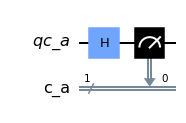

In [3]:
# qc_a

# Create registers
qr = QuantumRegister(1, 'qc_a')
cr = ClassicalRegister(1, 'c_a')

# Create circuit
qc_a = QuantumCircuit(qr, cr)

# Perform quantum operations
qc_a.h(qr[0])

# Measure
qc_a.measure(qr[0], cr[0])

# Draw
qc_a.draw(output='mpl')

<div class="alert alert-block alert-info">
    
    
**Simulating a quantum circuit**

&nbsp;

The **Aer** component allows for the simulation of the execution and measurement of a quantum circuit, locally, for a small number of qubits, using the `qasm_simulator`.

&nbsp;

For that, we need to call the simulator using the `BasicAer.get_backend` method. We then define a _job_, i.e. the task assigned to a specific backend - simulator or real quantum processor - by calling the function `execute(qc, backend, shots)`, where `qc` is the quantum circuit to be executed, `backend` is the execution backend, and `shots` is the number of executions to be performed.

&nbsp;

After the job is executed, we can extract a `result()`, which allows us to get the measurement result frequencies with `get_counts(qc)`, and, from that, plot an histogram of probabilities with the function `plot_histogram(counts)`.



</div>

In [7]:
# Use Aer's 'qasm_simulator'
#q_simulator = 

# Execute the circuit 1000 times on the qasm simulator
#job_a = 

# Grab the results from the job
#result_a = 
#counts_a = 

# Print frequencies, and plot histogram


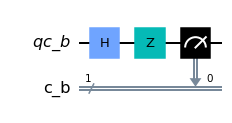

In [4]:
# qc_b

qr = QuantumRegister(1, 'qc_b')
cr = ClassicalRegister(1, 'c_b')

qc_b = QuantumCircuit(qr, cr)

qc_b.h(qr[0])
qc_b.z(qr[0])

qc_b.measure(qr[0], cr[0])

qc_b.draw(output='mpl')

In [9]:
# Execute simulation
#job_b = 

# Grab the results from the job
#counts_b = 

# Print frequencies, and plot histogram


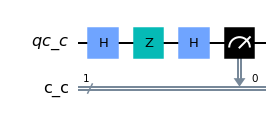

In [5]:
# qc_c

qr = QuantumRegister(1, 'qc_c')
cr = ClassicalRegister(1, 'c_c')

qc_c = QuantumCircuit(qr, cr)

qc_c.h(qr[0])
qc_c.z(qr[0])
qc_c.h(qr[0])

qc_c.measure(qr[0], cr[0])

qc_c.draw(output='mpl')

In [11]:
# Execute simulation
#job_c = 

# Grab the results from the job
#counts_c = 

# Print frequencies, and plot histogram


<div class="alert alert-block alert-warning">

**Exercise 1.2 - Gates and basis** (continued)

&nbsp;

The below diagram is a useful shorthand for quantum states conversion using quantum gates. It also depicts how quantum operations are reversible. A qubit in any of the four states $|0\rangle$, $|1\rangle$, $|-\rangle$, $|+\rangle$  can be converted to any other performing simple one qubit gates.

&nbsp;

<img src="https://raw.githubusercontent.com/afonsofr/Qiskit_hands_on/master/img/h_x_z.png" alt="" width="400 px" align="center">                                                                                                  

&nbsp;

**Questions:**


1. Compare the simulation results of `qc_a` and `qc_b`. Do similar measurement results imply the same quantum state is being measured?

1. Observe the results of `qc_c` and the diagram above. 

    1. How could we reach the same final state using only one quantum operation?
    1. Verify your answer to the previous question by calculating $H.Z.H$ (the corresponding matrices are defined above in this notebook).

</div>

&nbsp;

<div class="alert alert-block alert-info">
    
**Statevector simulator**

&nbsp;

**Question 1** of Exercise 1.2 can be verified by using another of **Aer** simulators, the `statevector_simulator`. This simulator is able to determine the vector describing the state of a quantum circuit at a given point.

To use it, we only need to define the the statevector simulator as our execution backend.

&nbsp;

**Note**: To get accurate results from the statevector simulator, no measurement operations can be applied to the circuit, since measurements collapse superposition states into deterministic ones.

</div>

In [7]:
# First, let's determine the vector describing the final state of the circuit qc_a

# Remove measurement operations from circuit

#qc_a.remove_final_measurements()

# Use Aer's 'statevector_simulator'
#v_simulator =

# Execute the circuit
#job_a = 

# Get the resulting state vector
#state_a = job_a.result().get_statevector(qc_a, decimals=3)

# Print vector as a column

print("Final state of qc_a:")
#for i in state_a:
#    print(i)

Final state of qc_a:


In [10]:
# Now, let's determine the final state of the circuit qc_b


# Execute the circuit
#job_b = 

# Get the resulting state vector
#state_b = 

# Print vector as a column
print("Final state of qc_b:")

#for i in state_b:
#    print(i)

Final state of qc_b:


From the state vector simulator results, we can determine the final states in bra-ket notation:

$$ |qc_a\rangle = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
1
\end{pmatrix}
= |+\rangle
$$

$$ |qc_b\rangle = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
-1
\end{pmatrix}
= |-\rangle
$$

<div class="alert alert-block alert-info">
    
**Unitary simulator**

&nbsp;

**Question 2** of Exercise 1.2 can be verified by using another of **Aer** simulators, the `unitary_simulator`. This simulator is able to determine the vector matrix describing the composition of operations in the quantum circuit - in this case, $H.Z.H$.

&nbsp;

**Note**: As with the `statevector_simulator` no measurement operations should be applied before a simulation.
</div>

In [14]:
# Now, let's determine the matrix of H.Z.H in q_c


# Use Aer's 'unitary_simulator'
#u_simulator = 

# Execute the circuit
#job_c = 

# Get the resulting state vector
#state_c = job_c.result().get_unitary(qc_c, decimals=3)

# Print vector as a column
print("Unitary matrix of qc_c:")

#for i in state_c:
#    print(i.round())

Unitary matrix of qc_c:


From the unitary simulator results, we can see that:

$$ H.Z.H =
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix} = X
$$


In [ ]:
# Draw transaction on the Bloch sphere
visualize_transition(qc_c, fpg=20, spg=1, trace=True)

&nbsp;

# 3. Multi-qubit states<a id='multi_qubits'></a>

&nbsp;

Multiple quantum bits can be described with the ket notation. The tensor product is typically implicit; for a state composed of qubits $q_0$ and $q_1$:

&nbsp;

$$
|q_1\rangle \otimes |q_0\rangle =  |q_1\rangle |q_0\rangle = |q_1 q_0\rangle
$$

&nbsp;

**Note**: The ordering convention adopted in Qiskit writes the first qubit of a circuit at the far-right of the ket, and adds each additional qubit on the left:

&nbsp;

$$ |q_n\rangle \otimes \cdots \otimes |q_1\rangle \otimes |q_0\rangle $$

&nbsp;

Keep in mind that this ordering may be different than quantum circuits and algorithms described in scientific literature, and needs to be taken into account when analysing results of multi-qubit measurements, or the algebraic description of multi-qubit operations and states.

<div class="alert alert-block alert-info">

**Example 1.2 - Tensor product**

Consider two non-entangled qubits of a quantum circuit, $q_a$ and $q_b$. Their joint-state description can be written in bra-ket notation, with the tensor product providing an algebraic description of the state.

&nbsp;

$$|q_a q_b\rangle = |q_a\rangle \otimes |q_b\rangle = 
\begin{pmatrix}
q_{a1} \\ 
q_{a2}
\end{pmatrix} \otimes
\begin{pmatrix}
q_{b1} \\ 
q_{b2}
\end{pmatrix} =
\begin{pmatrix}
q_{a1}.q_{b1} \\
q_{a1}.q_{b2} \\
q_{a2}.q_{b1} \\
q_{a2}.q_{b2}
\end{pmatrix}
$$

&nbsp;

Using the tensor product, we can determine the vector of an $n$-qubit basis state. For example:

&nbsp;

$$|10\rangle = |1\rangle \otimes |0\rangle = 
\begin{pmatrix}
0 \\ 
1
\end{pmatrix} \otimes
\begin{pmatrix}
1 \\ 
0
\end{pmatrix} = 
\begin{pmatrix}
0 \\ 
0 \\
1 \\
0
\end{pmatrix}
$$
</div>

&nbsp;

### Entanglement and Bloch sphere for multi-qubit states

&nbsp;

Since qubits can be entangled, multi-qubit states, in general, cannot be expressed by simply representing each qubit's Bloch sphere. This is because the dimension of the vector space rises exponentially with the number of qubits, to account for correlation between qubits. One attempt to visualize multi-qubit states is made [here](https://medium.com/qiskit/visualizing-bits-and-qubits-9af287047b28). 

**For a quantum system, its description is more than the sum of descriptions for each individual qubit.**

&nbsp;

## 3.1 Multi-qubit operations<a id='multi_ops'></a>

&nbsp;

### CNOT gate 

The controlled-NOT (or controlled-$X$) gate allows for the creation of entanglement between two qubits in a quantum circuit. The CNOT gate's action on basis states is to flip, i.e. apply an $X$ gate to, the target qubit (denoted as $\oplus$ in quantum circuits) if the control qubit  (denoted as $\bullet$), is $|1\rangle$; otherwise the target qubit goes unchanged.

The matrix describing a CNOT depends on which qubit acts as control. For a state $|q_1 q_0\rangle$, if we apply a CNOT operation with $q_1$ as control, the matrix is described as:

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}. 
$$

However, if $q_0$ is the control qubit, the gate is described by the following matrix:

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}. 
$$

In [15]:
# Create 2 registers and quantum circuit


# Perform CNOT operation
# The first argument is the control qubit, the second is the target

# If we switch the arguments, the gate turns 'upside down'

# Draw the circuit


<div class="alert alert-block alert-info">
    
<b>Example 1.3 - Entangling two qubits</b> 

&nbsp;

Admit a 2-qubit quantum system, with $| q_0 \rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1 \rangle)$ and $|q_1\rangle = | 0 \rangle $. The initial two-qubit state can be written using the tensor product (i.e. a separable state):

<br>
$$
|q_1 q_0 \rangle = |0\rangle \otimes \frac{1}{\sqrt{2}} \left ( |0\rangle + |1\rangle \right ) = \frac{1}{\sqrt{2}}\left ( |00\rangle + |01\rangle \right )
$$
<br>

Admit a CNOT gate $CX_{01}$ with qubit $q_0$ as control, and $q_1$ as target. The CNOT gate will map the two-qubit basis state $|01\rangle$ to the state $|11\rangle $, while leaving $|00\rangle$ unchanged:

&nbsp;

<br>
$$
CX_{01} |q_1 q_0\rangle = \frac{1}{\sqrt{2}}\left ( |00\rangle + |11\rangle \right )
$$
<br>

The two-qubit state can not be described in terms of a tensor product of individual qubits - the qubits are **entangled**.

</div>

### Other multi-qubit operations

The gate set presented so far allows for universal quantum computations, i.e. it is possible to decompose any quantum operations over $n$ qubits to arbitrary precision, using only this set of gates. How to efficiently determine and perform such a decomposition, however, is not a trivial problem.
    
Other notable operators:

- __SWAP gate__, which exchanges the state between two qubits:

&nbsp;

$$
\mathrm{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}.
$$

&nbsp;

- __Toffoli gate__ (or **CCNOT**), which performs a NOT operations on a target qubit, using two other qubits as controls.

In [16]:
# Create registers and quantum circuit

# Apply Toffoli - first two arguments are the controls

# Swap two qubits

# Draw the circuit


<div class="alert alert-block alert-info">

You can view a more extensive list of quantum operations in [Qiskit's online tutorials](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html).

</div>

<div class="alert alert-block alert-warning">

**Exercise 1.3 - Swap and CNOT equivalence**

&nbsp;

<img src="https://www.researchgate.net/publication/278400462/figure/fig1/AS:669049381994496@1536525211341/SWAP-gate-using-CNOT-gates_W640.jpg" alt="" width="600 px" align="center"> 
    
                             a)                                      b)

&nbsp;

Consider the circuits depicted in the image above.

1. Verify that operations **a)** and **b)** are equivalent, by building each into a quantum circuit, and comparing the unitary matrices with the `unitary_simulator`.

1. In a new circuit, prepare the state $|q_1 q_0\rangle = |+\rangle|0\rangle$. With the `statevector_simulator`, check the vector representation of the circuit, after preparing the initial state, and again after applying operation **b)**. Did the qubits swap states?


</div>

In [11]:
# Circuit a)

# Create registers and quantum circuit

# Swap two qubits

# Execute the circuit

# Get the resulting state vector

# Print vector as a column
print("Unitary matrix:")

#for i in uni_swap:
#    print(i.real)

Unitary matrix:


In [12]:
# Circuit b)

# Create registers and quantum circuit


# 3 CNOT


# Execute the circuit

# Get the resulting state vector

# Print vector as a column
print("Unitary matrix:")

#for i in uni_3cnot:
#    print(i.real)

Unitary matrix:


In [13]:
# Question 2

# Create registers and quantum circuit

# Prepare states

# Check statevector

# Get the resulting state vector

# Print vector as a column
print("Statevector:")

#for i in uni_swap2:
#    print(i)

Statevector:


In [14]:
# Now add operations

# 3 CNOT

# Check statevector again

# Get the resulting state vector

# Print vector as a column
print("Statevector:")

#for i in uni_swap2:
#    print(i)

Statevector:


<a id="summary"><a>

### Summary of Gates

Gates implemented in Qiskit devices:

$$u3(\theta,\phi,\lambda) = \begin{bmatrix}\cos(\theta /\ 2) & -e^{i \lambda }\sin(\theta /\ 2) \\ e^{i\phi}\sin(\theta /\ 2) & e^{i\lambda+i\phi}\cos(\theta/\ 2) \end{bmatrix}$$

$$u2(\phi,\lambda) = u3(\pi /\ 2,\phi,\lambda) = \begin{bmatrix}1 & -e^{i \lambda}\\ e^{i\phi}& e^{i(\lambda+\phi)} \end{bmatrix}$$

$$u1(\lambda) = u3(0,0,\lambda) = \begin{bmatrix}1 & 0\\ 0& e^{i\lambda} \end{bmatrix}$$

$$u0(\delta) = u3(0,0,0) = \begin{bmatrix}1 & 0\\ 0&1 \end{bmatrix}$$

Some gates you can use:

(Let qr being the quantum register and qc being the quantum circuit.)


|Gate Name|Syntax |Matrix|How is it implemented|        
|-|-|-|-|
|Identity |qc.id(qr)|  $Id = \begin{bmatrix} 1&0\\0&1 \end{bmatrix}$|$u0(1)$|
|Bit-flip or Pauli-X| qc.x(qr)| $ X = \begin{bmatrix} 0&1\\1&0 \end{bmatrix}$|$u3(\pi,0,\pi)$|
|Bit and phase-flip or Pauli-Y| qc.y(qr)|$ Y = \begin{bmatrix} 0&-i\\i&0 \end{bmatrix}$|$u3(\pi,\pi /\ 2,\pi /\ 2)$|
|Phase-flip or Pauli-Z| qc.z(qr)| $Z = \begin{bmatrix} 1&0\\0&-1 \end{bmatrix}$|$u1(\pi)$|
|Hadamard|qc.h(qr)| $ H =\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1\end{bmatrix}$|$u2(0,\pi)$|
|S or $\sqrt{Z}$-Phase|qc.s(qr)|$ S =\begin{bmatrix} 1 & 0 \\ 0 & i\end{bmatrix}$|$u1(\pi /\ 2)$|
|S$^\dagger$ or conjugate $\sqrt{Z}$-Phase|qc.sdg(qr)| $S^\dagger =\begin{bmatrix} 1 & 0 \\ 0 & -i\end{bmatrix}$|$u1(-\pi /\ 2)$|
|T or $\sqrt{S}$-Phase|qc.t(qr)| $T=\begin{bmatrix}1 & 0 \\ 0 & e^{i \pi /\ 4}\end{bmatrix}$| $u1( \pi /\ 4)$|
|T$^\dagger$ or conjugate $\sqrt{S}$-Phase|qc.tdg(qr)| $ T^\dagger =\begin{bmatrix}1 & 0 \\ 0 & e^{-i \pi /\ 4}\end{bmatrix}$| $u1( -\pi /\ 4)$|



Multiqubit gates:

The matrix looks different from the rest of the bibliography because qiskit uses different definitions of least and most significant qubits.

Let control be the the 0 qubit and the target the 1 qubit.

|Gate Name|Syntax |Matrix|        
|-|-|-|
|Controlled-X or controlled-Not|qc.cx(qr\[control\],qr\[target\])|$CX = \begin{bmatrix}1&0&0&0\\0&0&0&1\\0&0&1&0\\0&1&0&0\end{bmatrix}$  |
|Controlled-Y|qc.cy(qr\[control\],qr\[target\])|$CY = \begin{bmatrix}1&0&0&0\\0&0&0&-i\\0&0&1&0\\0&i&0&0\end{bmatrix}$   |
|Controlled-Z or controlled-Phase|qc.cz(qr\[control\],qr\[target\])| $CZ =\begin{bmatrix}1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&-1\end{bmatrix}$  |
|Controlled-Hadamard|qc.ch(qr\[control\],qr\[target\])|$CH = \begin{bmatrix}1&0&0&0\\0&\frac{1}{\sqrt{2}}&0&\frac{1}{\sqrt{2}}\\0&0&1&0\\0&\frac{1}{\sqrt{2}}&0&-\frac{1}{\sqrt{2}}\end{bmatrix}$  |
|SWAP|qc.swap(qr\[control\],qr\[target\])| $SAWP =\begin{bmatrix}1&0&0&0\\0&0&1&0\\0&1&0&0\\0&0&0&1\end{bmatrix}$  |

Finally, there is the measure gate.

* qc.measure(qr,cr) - it adds measures to all qubits
* qc.measure_all() - it adds measure to all qubits and creates the classical space to register the measures
* qc.measure(qr\[0\],cr\[0\]) - it adds a measure to qubit 0 and saves value in classical register 0

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table